# Dimensionality reduction techniques

### PCA - Feature extraction

PCA aims to find the directions of maximum variance in high-dim data and projects this into a new subspace with equal or fewer dims. The orthogonal axes (pc's) on the new subspace can be interpreted as the directions of maximum variance  given the constraint  that the new feature axes are orthogonal to each other. 

The first PC will have the max variance and all consequent PC's will have the latgest possible variance given that they are uncorrelated (orthogonal) to the other PC's.PCA directiosn are highly sensitive to data scaling and we need to standardize the features prior to PCA if the features were measured on different scaled and we want to assign equal importance to all features.

+ standardize the d-dim dataset
+ construct covariance matrix
+ decompose the covariance matrix into its eigenvectors and eigenvalues
+ select k eigenvectors that correspond to the k largest eigenvalues where k = the subspace dim
+ construct  aprojection matrix W from the top k eigenvectors
+ transform the d-dim input dataset X using the projection matrix W to obtain a new k-dim subspace

In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
## separate into training (70%)andf test (30%) and standardize it to unit variance 
from sklearn.cross_validation import train_test_split

X, y = df_wine.iloc[:, 1:].values , df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## PCA covariance  matrix + explained variance ratio plot

a d x d symmetric covariance matrix where d is the no of dims in the dataset and stores the pairwise covariances between the features.

Now after standardizing the sample means are zero. A positive covariance between 2 features indicate that they increase of decrease together. A negative covariance mean that the features vary in opposite directions

The **eigenvectors** of the co-variance matrix represent the PC's (the directions of maximum variance), whereas the corresponding **eigenvalues** will define their magnitide. In the wineset we would obtain 13 x 13 eigenvectors and eigenvalues from the covariance matrix.

In [5]:
cov_mat = np.cov(X_train_std.T) ## covariance on the Transposed standardized X_train set
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)

# *using linalg_eig function we performed eigendecomposition yielding a vector (eigen_vals) consisting of 
# 13 eigenvalues and the corresponding eigenvectors stored as columns


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


In [6]:
cov_mat[:2]

array([[ 1.00813008,  0.08797701,  0.23066952, -0.32868099,  0.2141631 ,
         0.35576761,  0.2991246 , -0.16913744,  0.09649074,  0.56962271,
        -0.04781543,  0.07403492,  0.63277882],
       [ 0.08797701,  1.00813008,  0.2016416 ,  0.30658143, -0.06030917,
        -0.30124242, -0.41221162,  0.36616593, -0.19190146,  0.30749173,
        -0.54992807, -0.39352761, -0.20253906]])

now, we want only the subset of eigenvectors that explain most of the variance. Since the eigenvalues  define the magnitude of the eigenvectors, we have to sort the eigenvalues by decreasing magnitude: we want the top k eigenvectors based in the values of their corresponding eigenvalues.


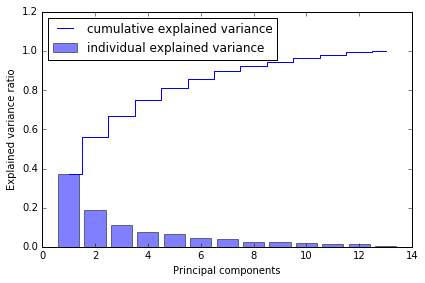

In [7]:
## before plotting thos k eigenvectors, let's plot the variance explained rations of the eigenvalues:
## VARIANCE EXPLAINED RATIO is simply the fraction of the eigenvalue and the total sum of the eigenvalues

tot = sum(eigen_vals)
var_exp = [(i/ tot) for i in sorted(eigen_vals, reverse = True)] 
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [21]:
## NOTE PCA is unsupervised: info about he class labels is ignored

## Feature transformation

After decompostion of the covariance matrix into eigenpairs: we now transform the Wine dataset onto the new PC axes.

In [8]:
## sort the eigenpairs by decreasing order of the eigenvalues:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

In [9]:
eigen_pairs[:2] ## 2 largest values explain +/- 60% of the variance in this dataset 

[(4.8923083032737473,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592293,
  array([-0.50417079, -0.24216889, -0.28698484,  0.06468718, -0.22995385,
         -0.09363991, -0.01088622, -0.01870216, -0.03040352, -0.54527081,
          0.27924322,  0.174365  , -0.36315461]))]

In [10]:
## create a 13 * 2 projection matrix W from the top 2 eigenvectors. 
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

('Matrix W:\n', array([[ 0.14669811, -0.50417079],
       [-0.24224554, -0.24216889],
       [-0.02993442, -0.28698484],
       [-0.25519002,  0.06468718],
       [ 0.12079772, -0.22995385],
       [ 0.38934455, -0.09363991],
       [ 0.42326486, -0.01088622],
       [-0.30634956, -0.01870216],
       [ 0.30572219, -0.03040352],
       [-0.09869191, -0.54527081],
       [ 0.30032535,  0.27924322],
       [ 0.36821154,  0.174365  ],
       [ 0.29259713, -0.36315461]]))


In [11]:
# using W matrix we can nowtransform a sample x (1 * 13 dim row vector from the standardized training set
# onto the PCA subspace obtaining X', a now 2-dim. Sample vector consisting of 2 new features. F.i.:
X_train_std[0].dot(w)

array([ 2.59891628, -0.00484089])

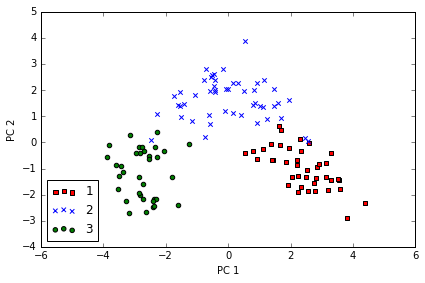

In [12]:
# tranform the whole set:
X_train_pca =  X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

## data is ore spread along the x-axis (first PC) which is consistent with the explained var ratio plot
## We can see that a linear classifier would likely be able to separate the classes very well!

## PCA and logistic regression from sklearn

Let's use the PCA , classify the transformed samples via logistic regression and visualize the decision regios via the **plot_decision_region function defined in Chapter 2**

In [16]:
from sklearn.decomposition import PCA

In [17]:
## let's repdocue using sklearn:
pca =  PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

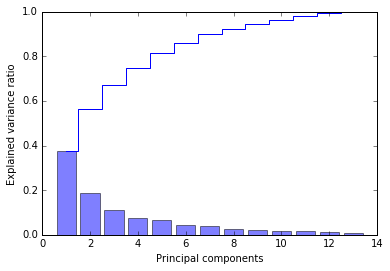

In [18]:
plt.bar(range(1,14), pca.explained_variance_ratio_, alpha = .5, align= 'center')
plt.step(range(1,14), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

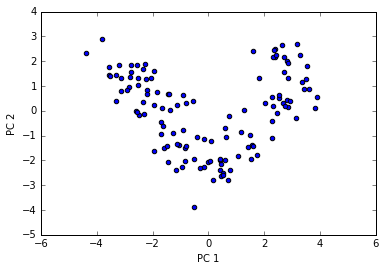

In [19]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

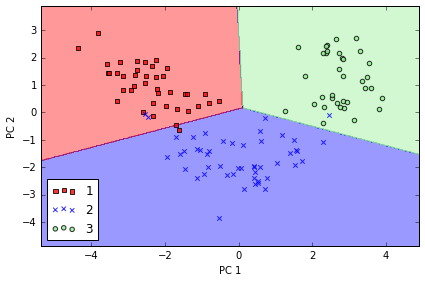

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_train_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

In [22]:
# if we are interested in the explained variance rations: we set n_components to None and access the
# explained_variance_ratio_ attribute:

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

## Linear Discriminant Analysis (LDA)

Where PCA attempts to find the orthogonal component axes of maximum variance, LDA attempts to find the feature subspace that optimizes class separability. Both are linear transformation techniques, but LDA is supervised.

one assumption in LDA is that the data is normally distributed. Also we assume that the classes have identical covariance matrices and features are statistically independent from each other. However, if one or more of assumptions is slightly violated, the LDA still works reasonably well in some cases.

keysteps:
+ Standardize the d-dim dataset (d= number of features)
+ for each class: compute the d-dim mean vector
+ construct the between-class scatter matrix S(b) and the within-class scatter Matrix S(w)
+ Compute eigenvectors and corresponding eigenvalues of Matrix S(w)S(b)
+ Choose the k eigenvectors that correspond to the k largest eigenvalues to construct the d x k-dim transformation matrix W (eigenvectors are the columns of this matrix)
+ project the samples onto the new feature subspace using the W-matrix

In [23]:
#from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
## calculating the mean vectors for each class:
np.set_printoptions(precision = 4)

mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train ==  label], axis= 0))
    print ('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [25]:
# compute the within class scatter matrix Sw. = summing up the invidual scatter matrices of 
# each individual class

d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [26]:
# the assumption we make is that the class labels are uniformly distributed. However this is not the case:
np.bincount(y_train)[1:]

array([40, 49, 35], dtype=int64)

In [27]:
# thus we want to scale the invidual scatter matrices before summing them up into Sw

d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [28]:
# calculate the between-class scatter matrix S(b)

mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [29]:
# instead of performing the eigendecomposition on the covariance matrix (PCA) , we solve the 
# generalized eigenvalue problem of the matrix S(w)S(b)

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [30]:
# Sort eigenvectors in decreasing order of the eigenvalues:

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

452.721581245
156.43636122
9.88990874031e-14
4.16407492273e-14
4.16407492273e-14
3.75914913898e-14
2.84217094304e-14
1.72789891047e-14
1.72789891047e-14
1.34054159181e-14
6.74584102962e-15
6.74584102962e-15
1.31558440218e-15


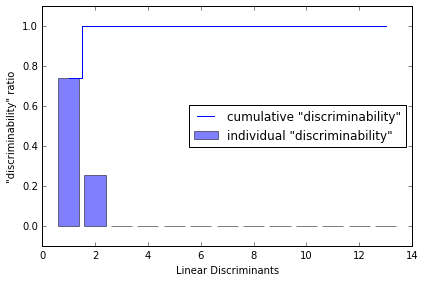

In [31]:
# measure how much class-discriminatory information is captured by the linear discriminants (eigenvectors)
# so let's plot the linear discriminats by decreasing eigenvalues

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()

# first 2 linear discriminants capture +/- 100% of the the useful information

In [32]:
# now stack the 2 most discriminative eigenvector columns t creat the transformation matrix W:

w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

('Matrix W:\n', array([[-0.0662, -0.3797],
       [ 0.0386, -0.2206],
       [-0.0217, -0.3816],
       [ 0.184 ,  0.3018],
       [-0.0034,  0.0141],
       [ 0.2326,  0.0234],
       [-0.7747,  0.1869],
       [-0.0811,  0.0696],
       [ 0.0875,  0.1796],
       [ 0.185 , -0.284 ],
       [-0.066 ,  0.2349],
       [-0.3805,  0.073 ],
       [-0.3285, -0.5971]]))


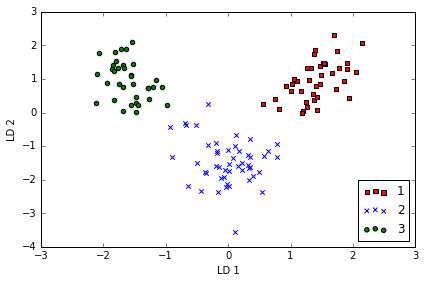

In [33]:
# using W matrix we can now transform the training data by multiplying the matrices:

X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()

# the 3 wine classes are linearly separable in the new feature subspace:

## LDA via sklearn

In [34]:
from sklearn.lda import LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

C:\Users\Gebruiker\Anaconda\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


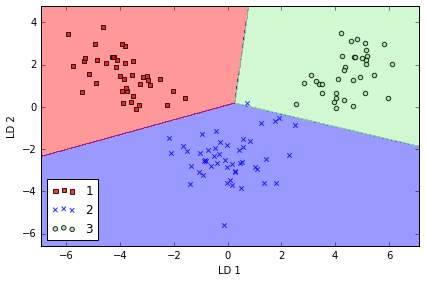

In [35]:
# let's see how the logistic regression classifier handles the lower-dimensional training set 
# after the LDA transformation

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda3.png', dpi=300)
plt.show()

# one misclassification. We could probbaly hanlde that one via regularization

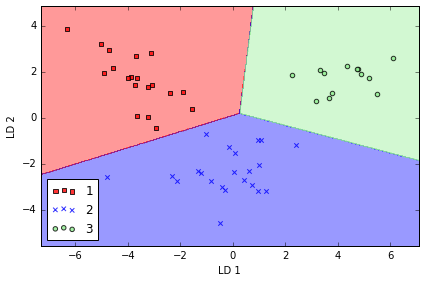

In [38]:
# let's have a look at the test set


X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()

## the logistic regression classifier yields a perfect result for classifying the samples in the test 
# set by only using 2-dim feature subspace instead of the original 13 features !

### Using kernel tricks for nonlinear mappings

we can tackle nonlinear problems by by projecting them onto a new feature space of higher dimensionality where the classes become linearly separable.

Let's implement an RBF (Radial Basis Function) kernel PCA following the 3 steps that summarized the kernel PCA approach.

In [40]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))

    return X_pc

### Example 1 separating half-moon shapes

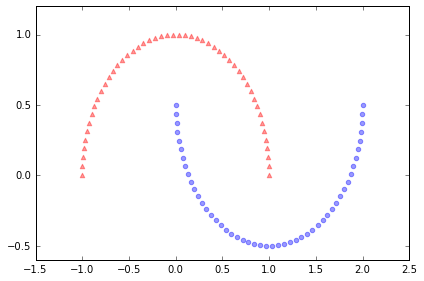

In [57]:
from sklearn.datasets import make_moons # Make two interleaving half circles
X, y = make_moons(n_samples = 100, random_state = 123)

plt.scatter(X[y == 0,0], X[y== 0,1], color= 'red', marker='^', alpha= .4)
plt.scatter(X[y == 1,0], X[y== 1,1], color= 'blue', marker='o', alpha= .4)
plt.tight_layout()

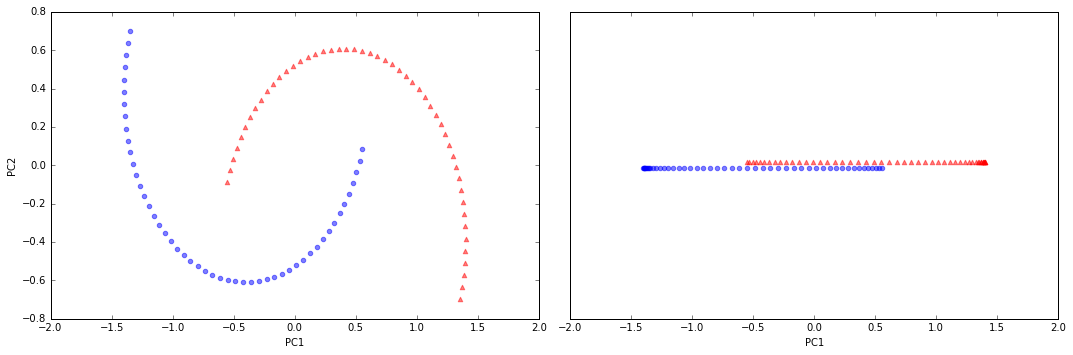

In [68]:
# Let's first see how regular PCA would perform. We can already see that the classes are not linearly separable.
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize =[15,5])

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5) # +0.02/-0.02 to better visualize the class overlap
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

# note that we plot the first PC only. Also remember that PCa is a non-supervised MLA and does not use class
# label info in order to maximize the variance. The triangular and circular symols are only for visialization 
# purposes

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()

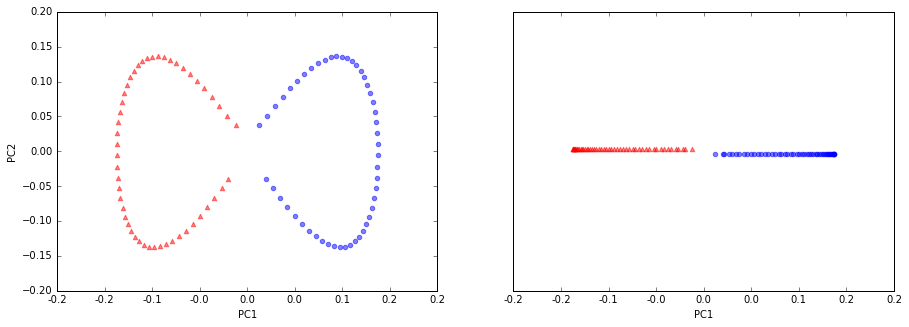

In [72]:
# now let`s try our rbf_kernel_pca function. POWERFUL STUFF!
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma= 15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize =[15,5])
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f')) # for the 0.1 etc. notation on x-axis
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

Unfortunately, there is no universal value for the tuning of the gamma parameter that works well for different datasets. To find the optimal value requires experimentation and can be done via hyper parameter tuning.

### example 2 separating concentric circles

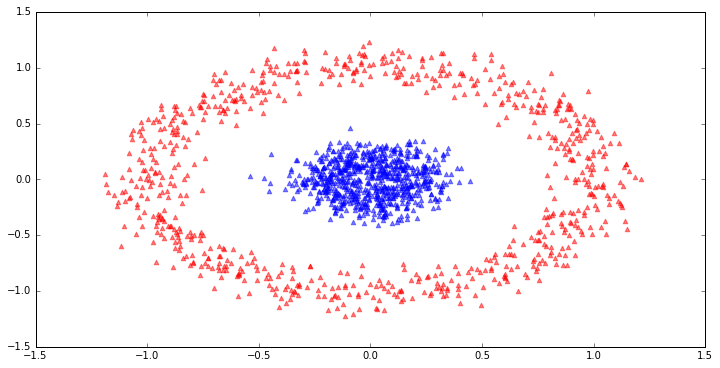

In [87]:
from sklearn.datasets import make_circles #Make a large circle containing a smaller circle in 2d.

X, y = make_circles(n_samples=1500, random_state=123, noise= .1, factor =.2)
# noise = Standard deviation of Gaussian noise added to the data
# factor = Scale factor between inner and outer circle.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,6])
plt.scatter(X[y==0,0], X[y==0,1], color = 'red', marker='^', alpha= .5)
plt.scatter(X[y==1,0], X[y==1,1], color = 'blue', marker='^', alpha= .5)

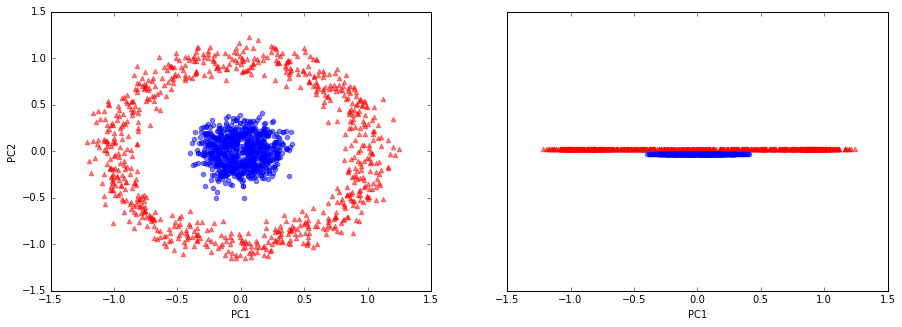

In [91]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize =[15,5])

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((750, 1)) + 0.02,
              color='red', marker='^', alpha=0.5) # +0.02/-0.02 to better visualize the class overlap
ax[1].scatter(X_spca[y == 1, 0], np.zeros((750, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

# note that we plot the first PC only. Also remember that PCa is a non-supervised MLA and does not use class
# label info in order to maximize the variance. The triangular and circular symols are only for visialization 
# purposes

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

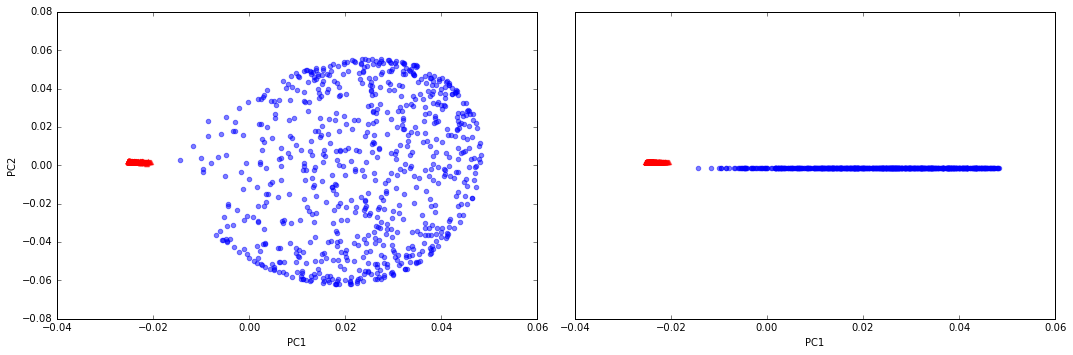

In [93]:
# again the RBF kernel PCA projects the data onto new subspace where it became linearly separable
X_kpca = rbf_kernel_pca(X, gamma= 15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize =[15,5])
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((750, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((750, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()

### Projecting new datapoints

Above examples are nice for demo purposes but in real applications we may have more than one dataset to be transformed (fi training & testing data and typically also new samples we will collect fater the model building and evaluation. Let's see how to project datapoints that were not part of the training dataset.

- Remeber that in case of PCA, we project data by calculating the dot product between a transformation matrix and the input samples; the columns of the projection matrix are the top eigenvectors (v) that we obtained from the covariance matrix. Now how can we transfer this concept to kernel PCA?

- In case of kernel PCA: here we obtained an eigenvector (a) of the centered kernel matrix (not the covariance matrix), which means that those are the samples that are already projected onto the principal component axis v. We have to calculate the pairwise RBF kernel (similarity) between each i-th sample of the training dataset and the new sample X1.


- After calculating the similarity between the new samples and the samples in the training set, we have to normalize the eigenvector A by its eigenvalue. Below is the modified rbf_kernel_pca fucntion that we implemented earlier so that it also returns the eigenvalues of the kernel matrix:

In [95]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   
     
     lambdas: list
       Eigenvalues

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, -i]
                              for i in range(1, n_components + 1)))

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1, n_components + 1)]

    return alphas, lambdas

In [97]:
# let's create the half-moon dataset and porject it onto a 1-dim subspace using the 
# updated rbf_kernel_pca function
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

To make sure that we implement the code for projecting new samples, let's assume the 26th point from the half-moon dataset is the new data point x1, and our task is to project it onto this new subspace.:

In [101]:
x_new =X[25]
print (x_new)

x_proj = alphas[25]
print ('Original projection: {} '.format(x_proj))

[ 1.8713  0.0093]
Original projection: [ 0.0788] 


In [102]:
def project_x(x_new, X, gamma, alphas, lambdas):
    """
    this function enables us to project new datapoints as well
    """
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [103]:
# projection of the "new" datapoint
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj 

array([ 0.0788])

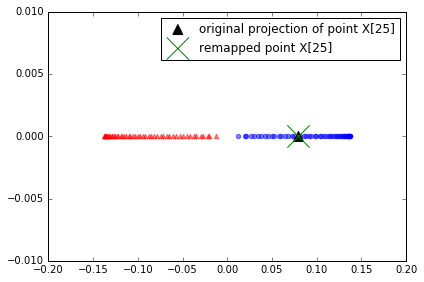

In [105]:
# lastly lets visualize the projection on the first PC
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)

plt.tight_layout()

# We mapped the sample X1 onto the first PC correctly.!

# Kernel PCA in sklearn

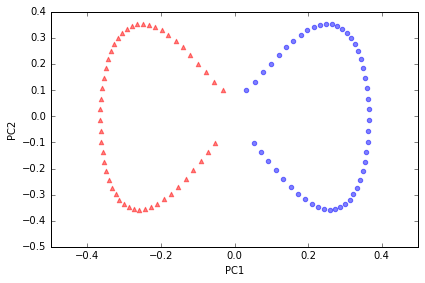

In [107]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

Sklearn also implements advanced techniques for non-linear dimensionality reduction. Find an overview on http://scikit-learn.org/stable/modules/manifold.html